In [330]:
import itertools
from typing import Iterable

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


def plot(df_or_seq):
    if isinstance(df_or_seq, pd.DataFrame):
        seq = map(lambda x: x[1].values, df_or_seq.groupby("label"))
    else:
        seq = df_or_seq

    plt.gca().set_aspect("equal")
    for X in seq:
        plt.scatter(X[:, 0], X[:, 1])


def as_df(results, labels: Iterable[str] = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"):
    """Collects sequence of X into a labeled pd.DataFrame"""
    dfs = []
    for label, result in zip(labels, results):
        if isinstance(result, tuple):
            label, X = result
        else:
            X = result

        dfs.append(pd.DataFrame(dict(x=X[:, 0], y=X[:, 1], label=label)))

    df = pd.concat(dfs)
    df.label = df.label.astype("category")
    return df


Covariance2D = tuple[tuple[float, float], tuple[float, float]]

### Confusion 1

- Case: 5 equal sized groups, well separated
- Expected: no confusion

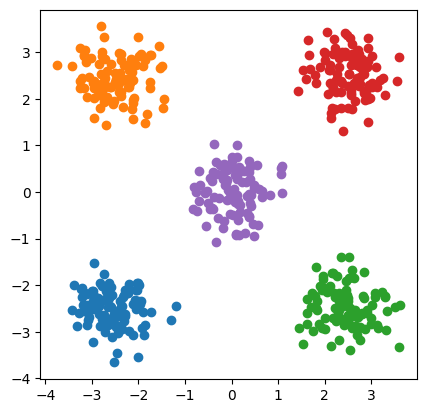

In [331]:
def case1(x: float = 2.5, cov: Covariance2D = ((0.2, 0), (0, 0.2)), size: int = 100):
    yield np.random.multivariate_normal((-x, -x), cov, size)
    yield np.random.multivariate_normal((-x, x), cov, size)
    yield np.random.multivariate_normal((x, -x), cov, size)
    yield np.random.multivariate_normal((x, x), cov, size)
    yield np.random.multivariate_normal((0, 0), cov, size)


plot(case1())

### Confusion 2

- Case: 5 equal sized groups, 2 mixed
- Expected: confusion with last two groups

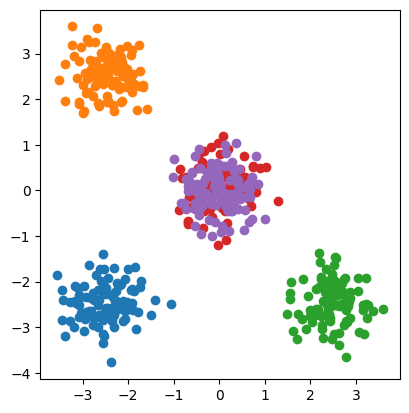

In [332]:
def case2(x: float = 2.5, cov: Covariance2D = ((0.2, 0), (0, 0.2)), size: int = 100):
    yield np.random.multivariate_normal((-x, -x), cov, size)
    yield np.random.multivariate_normal((-x, x), cov, size)
    yield np.random.multivariate_normal((x, -x), cov, size)
    yield np.random.multivariate_normal((0, 0), cov, size)
    yield np.random.multivariate_normal((0, 0), cov, size)


plot(case2())

### Confusion 3

- Case: 5 groups of various sizes, small group intermixed with larger
- Expected: smaller group should be confused with larger mixed group

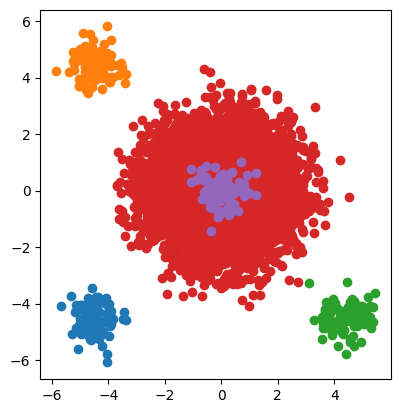

In [333]:
def case3(x: float = 4.5, cov: Covariance2D = ((0.2, 0), (0, 0.2)), size: int = 100):
    size_factor = 100
    cov_factor = 6
    cov = np.array(cov)

    yield np.random.multivariate_normal((-x, -x), cov, size)
    yield np.random.multivariate_normal((-x, x), cov, size)
    yield np.random.multivariate_normal((x, -x), cov, size)
    yield np.random.multivariate_normal((0, 0), cov * cov_factor, size * size_factor)
    yield np.random.multivariate_normal((0, 0), cov, size)


plot(case3())

### Confusion 4

- Case: 5 groups of various sizes, small group intermixed with larger
- Expected: smaller group should be confused with larger mixed group

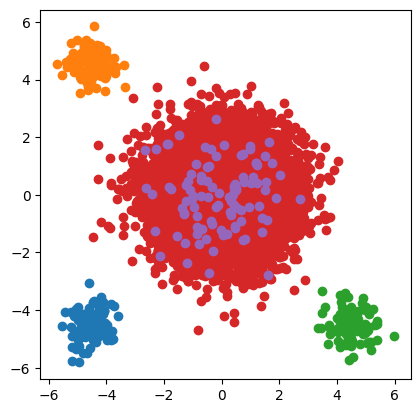

In [334]:
def case4(x: float = 4.5, cov: Covariance2D = ((0.2, 0), (0, 0.2)), size: int = 100):
    size_factor = 100
    cov_factor = 6
    cov = np.array(cov)

    yield np.random.multivariate_normal((-x, -x), cov, size)
    yield np.random.multivariate_normal((-x, x), cov, size)
    yield np.random.multivariate_normal((x, -x), cov, size)
    yield np.random.multivariate_normal((0, 0), cov * cov_factor, size * size_factor)
    yield np.random.multivariate_normal((0, 0), cov * cov_factor, size)


plot(case4())

### Confusion 5

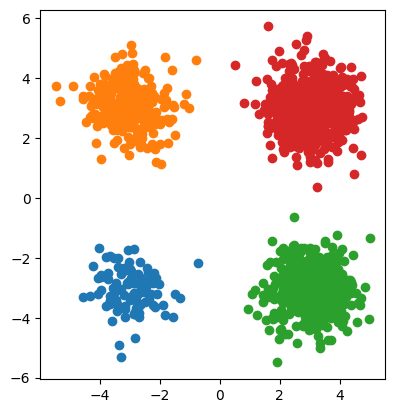

In [335]:
def case5(x: float = 3, cov: Covariance2D = ((0.5, 0), (0, 0.5))):
    for mean, size in zip(
        itertools.product((-x, x), (-x, x)),
        map(lambda x: 100 * x, range(1, 10, 2))
    ):
        yield np.random.multivariate_normal(mean, cov, size)


plot(case5())